In [6]:
import pandas as pd
import numpy as np
import random

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


random.seed(42)
np.random.seed(42)

# === FRASES BASE ===
positivas = [
    "El metro siempre llega a tiempo",
    "El servicio es muy seguro",
    "Me siento orgulloso del transporte en Medellín",
    "Las estaciones están limpias y ordenadas",
    "Excelente conexión con el tranvía",
    "Los buses integrados facilitan el transporte",
    "La atención del personal es muy buena",
    "El servicio es eficiente y rápido",
    "La experiencia de viaje es cómoda",
    "El sistema es un ejemplo para otras ciudades",
    "El personal es muy amable con los usuarios",
    "La información en las pantallas es clara",
    "El metro es puntual y confiable",
    "El aire acondicionado funciona bien",
    "Los trenes son modernos y cómodos",
    "El sistema es muy organizado",
    "La integración con el metrocable es excelente",
    "El viaje es tranquilo y seguro",
    "El servicio me ahorra mucho tiempo",
    "El transporte es una solución ejemplar para la ciudad",
    "El pago con tarjeta es ágil y práctico",
    "La aplicación móvil funciona muy bien",
    "Los guardias brindan confianza y seguridad",
    "La frecuencia de los trenes es adecuada",
    "El servicio en festivos es excelente",
    "El metro es un símbolo de cultura ciudadana",
    "La señalización es clara y fácil de seguir",
    "El servicio de cable es rápido y seguro",
    "La red de transporte está bien integrada",
    "La limpieza es constante y destacable"
]

negativas = [
    "La estación estaba demasiado llena",
    "El servicio tiene muchas demoras",
    "Los buses alimentadores son muy lentos",
    "El precio del pasaje es muy alto",
    "La calidad del servicio ha bajado",
    "Tuve que esperar mucho tiempo",
    "El metro iba demasiado congestionado",
    "El mantenimiento de algunas estaciones es deficiente",
    "No hay suficientes rutas para ciertos barrios",
    "El servicio falla constantemente en horas pico",
    "El aire acondicionado no funciona bien",
    "Los trenes se demoran en salir",
    "Las escaleras eléctricas no sirven",
    "El viaje fue incómodo y largo",
    "La información en pantallas es confusa",
    "El personal no resolvió mis dudas",
    "El metrocable estuvo fuera de servicio",
    "Las filas para ingresar son muy largas",
    "La app de recarga presenta fallas",
    "El servicio no cumple con lo esperado",
    "El sonido en los altavoces es deficiente",
    "Los baños no estaban limpios",
    "El tiempo de espera fue exagerado",
    "Algunas estaciones no tienen buena iluminación",
    "El servicio en festivos es muy limitado",
    "La tarjeta a veces presenta errores de validación",
    "El precio no corresponde con la calidad",
    "Las puertas tardan demasiado en abrirse",
    "La seguridad en ciertas estaciones es baja",
    "El viaje resultó agotador"
]

# === VARIACIONES ===
lugares = [
    "en la estación San Antonio", "en Bello", "en Itagüí", "en Niquía", "en Sabaneta",
    "en Envigado", "en la estación Poblado", "en el centro de la ciudad",
    "por la avenida Oriental", "cerca a la estación Industriales",
    "en la estación Universidad", "en Acevedo", "en Prado", "en Aguacatala",
    "en la estación Caribe", "en Hospital", "en la estación Floresta", "en Tricentenario"
]

tiempos = [
    "en hora pico", "por la mañana", "en la noche", "los fines de semana",
    "cuando voy a trabajar", "cuando regreso a casa", "a la salida de la universidad",
    "después de las seis", "en días de lluvia", "cuando hay eventos en el estadio",
    "durante la Feria de las Flores", "en temporada decembrina",
    "a mitad de semana", "en vacaciones", "cuando hay conciertos en la ciudad"
]

opiniones_pos = [
    "y eso me parece excelente", "lo que genera confianza", "y es algo que destaco",
    "lo cual me hace sentir tranquilo", "y me parece muy bacano", "lo que ayuda bastante",
    "y me da tranquilidad", "lo cual es admirable", "y me alegra mucho",
    "y considero que es un orgullo paisa", "y me parece un gran beneficio",
    "y me motiva a usarlo todos los días", "y me inspira confianza", "y me hace sentir satisfecho"
]

opiniones_neg = [
    "y debería mejorar aún más", "lo que me incomodó bastante", "y no debería pasar",
    "y causa muchos problemas", "y me dejó una mala impresión", "y me parece un abuso",
    "y me generó mucha rabia", "lo cual me preocupa bastante", "y me parece una pérdida de tiempo",
    "y eso desanima mucho", "y genera desconfianza", "y afecta negativamente mi día",
    "y me parece frustrante", "y me dejó inconforme", "y es un gran problema para los usuarios"
]

# === GENERADOR ===
def generar_opinion(frases, sentimiento, n=3000):
    opiniones = []
    for _ in range(n):
        base = random.choice(frases)

        variaciones = []
        if random.random() < 0.8:  # lugar
            variaciones.append(random.choice(lugares))
        if random.random() < 0.8:  # tiempo
            variaciones.append(random.choice(tiempos))
        if random.random() < 0.9:  # opinión extra positiva o negativa
            if sentimiento == 1:
                variaciones.append(random.choice(opiniones_pos))
            else:
                variaciones.append(random.choice(opiniones_neg))

        texto = f"{base} {' '.join(variaciones)}".strip()
        opiniones.append((texto, sentimiento))
    return opiniones

# === GENERAMOS DATASET ===
positivas_gen = generar_opinion(positivas, 1, 3000)
negativas_gen = generar_opinion(negativas, 0, 3000)

data = positivas_gen + negativas_gen
random.shuffle(data)

df = pd.DataFrame(data, columns=["texto", "sentimiento"])
df["id"] = range(1, len(df) + 1)
df = df[["id", "texto", "sentimiento"]]

# Guardar dataset
df.to_json("opiniones.json", orient="records", force_ascii=False, indent=2)

print("✅ Dataset enriquecido y limpio generado: 6000 registros")
df.head(10)


✅ Dataset enriquecido y limpio generado: 6000 registros


,id,texto,sentimiento
0,1,Los trenes son modernos y cómodos en Hospital ...,1
1,2,El metro siempre llega a tiempo en la estación...,1
2,3,El servicio tiene muchas demoras por la avenid...,0
3,4,El servicio es eficiente y rápido en Aguacatal...,1
4,5,La limpieza es constante y destacable en Aceve...,1
5,6,La seguridad en ciertas estaciones es baja por...,0
6,7,La estación estaba demasiado llena en Itagüí y...,0
7,8,El servicio no cumple con lo esperado en Trice...,0
8,9,El metro es puntual y confiable cerca a la est...,1
9,10,El servicio de cable es rápido y seguro en Bel...,1


In [7]:

# === Cargar dataset desde JSON ===
df = pd.read_json("opiniones.json")

# Variables
X = df["texto"].values
y = df["sentimiento"].values

# === Split 80/20 (train/test) ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Tokenización ===
num_words = 10000   # tamaño del vocabulario
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

# Convertir a secuencias
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# === Padding (normalizamos longitud de frases) ===
max_len = 30  # longitud máxima de frase (ajustable según análisis)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post", truncating="post")

print("✅ Preprocesamiento completo")
print("Tamaño vocabulario:", len(tokenizer.word_index))
print("Forma X_train_pad:", X_train_pad.shape)
print("Forma X_test_pad:", X_test_pad.shape)


✅ Preprocesamiento completo
Tamaño vocabulario: 277
Forma X_train_pad: (4800, 30)
Forma X_test_pad: (1200, 30)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 64   # tamaño del embedding
lstm_units = 64      # número de neuronas en LSTM

model = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim),  # sin input_length
    LSTM(lstm_units, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    X_train_pad, y_train,
    epochs=5,              # puedes ajustar a más épocas si quieres
    batch_size=64,
    validation_data=(X_test_pad, y_test),
    verbose=1
)

Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7896 - loss: 0.3827 - val_accuracy: 0.9700 - val_loss: 0.1538
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9971 - loss: 0.0232 - val_accuracy: 1.0000 - val_loss: 9.0864e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9977 - loss: 0.0181 - val_accuracy: 0.9833 - val_loss: 0.1246
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9923 - loss: 0.0528 - val_accuracy: 0.9842 - val_loss: 0.0785
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9906 - loss: 0.0444 - val_accuracy: 0.9983 - val_loss: 0.0096


In [11]:
# Evaluar en test
loss, acc = model.evaluate(X_test_pad, y_test, verbose=0)
print(f"✅ Accuracy en test: {acc:.4f}")


✅ Accuracy en test: 0.9983


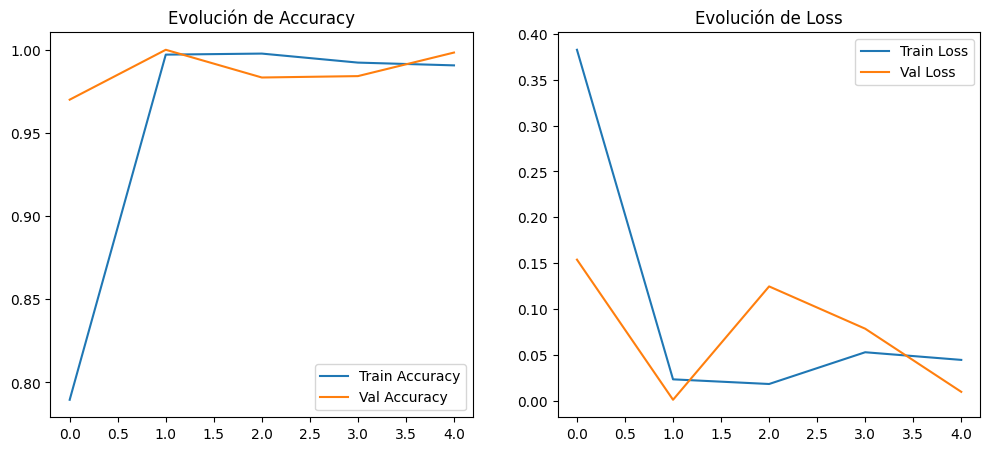

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Evolución de Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Evolución de Loss")

plt.show()


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# === TF-IDF para vectorizar texto ===
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# === Modelo de Regresión Logística ===
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

# Evaluar
y_pred = log_reg.predict(X_test_tfidf)
acc_logreg = accuracy_score(y_test, y_pred)

print(f"✅ Accuracy Regresión Logística en test: {acc_logreg:.4f}")


✅ Accuracy Regresión Logística en test: 1.0000


In [17]:
# === Función para predecir nuevas opiniones ===
def predecir_opinion(textos):
    # Convertimos a secuencia de enteros
    seq = tokenizer.texts_to_sequences(textos)
    # Aplicamos padding
    pad = pad_sequences(seq, maxlen=30, padding="post", truncating="post")
    # Predicción
    preds = model.predict(pad)
    # Resultado en binario con umbral 0.5
    clases = (preds > 0.5).astype("int32")
    
    for t, p, c in zip(textos, preds, clases):
        print(f"Texto: {t}")
        print(f"Probabilidad positivo: {p[0]:.4f} -> Predicción: {'Positiva ✅' if c[0]==1 else 'Negativa ❌'}\n")

# === Ejemplos de prueba manual ===
nuevas_opiniones = [
    "El servicio del metro es genial y muy puntual",
    "Tuve que esperar demasiado en San Antonio y me incomodó bastante",
    "El aire acondicionado no funcionaba y el viaje fue incómodo",
    "Los trenes estaban limpios y el personal fue amable",
    "El precio del pasaje está muy alto y debería mejorar"
]

predecir_opinion(nuevas_opiniones)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Texto: El servicio del metro es genial y muy puntual
Probabilidad positivo: 0.9999 -> Predicción: Positiva ✅

Texto: Tuve que esperar demasiado en San Antonio y me incomodó bastante
Probabilidad positivo: 0.0020 -> Predicción: Negativa ❌

Texto: El aire acondicionado no funcionaba y el viaje fue incómodo
Probabilidad positivo: 0.0020 -> Predicción: Negativa ❌

Texto: Los trenes estaban limpios y el personal fue amable
Probabilidad positivo: 0.0075 -> Predicción: Negativa ❌

Texto: El precio del pasaje está muy alto y debería mejorar
Probabilidad positivo: 0.0020 -> Predicción: Negativa ❌

